In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\15512\Desktop\Healthcare Project\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# Check for any null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Preparation

In [3]:
# Converting strings into numeric data values

df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


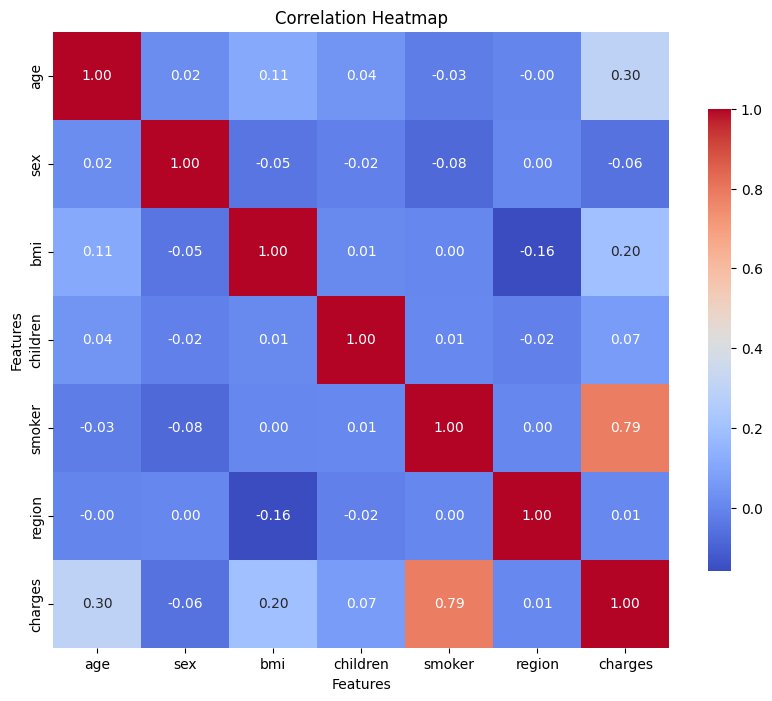

In [5]:
# Data correlation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

According to the correlation matrix, smoking has a very strong positive correlation with insurance costs, with a coefficient of 0.79. Age and BMI also have positive correlations with insurance costs, but to a lesser extent, with coefficients of 0.3 and 0.2, respectively. This suggests that smoking is a much stronger predictor of insurance costs than either age or BMI. However, all three features have a significant impact on insurance costs, and should be taken into consideration when developing a predictive model.

# Dividing the Dataset into Training and Testing Sets
Splitting the dataset into training and testing sets allows us to evaluate how well our machine learning models can make accurate predictions on new, unseen data. It also helps to prevent overfitting and ensures the reliability of our models.

In [6]:
# Preparing data for machine learning by separating input features and target variable
x = df[['age','bmi', 'smoker']]
y = df[['charges']]
x.columns = ['age', 'bmi', 'smoker']

In [7]:
# Split 20% with test_size=0.2
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.columns = ['age', 'bmi', 'smoker']
X_test.columns = ['age', 'bmi', 'smoker']
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 3) (1338, 1)
(1070, 3) (1070, 1)
(268, 3) (268, 1)


Printing the shape of each test subset helps us ensure that the split has worked as intended and we can see here that the training and test sets have been split 80/20 as planned.

# Linear Regression

A linear regression model is a good fit for this data because it can help us understand the linear relationship between the independent variables (age, bmi, smoker) and the dependent variable (charges). The aim of the model is to find the best linear relationship that describes the data.

In [8]:
# Calculating the accuracy of the model by computing the R2 score between predicted and real values


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(f'Accuracy: {r2_score(y_test, y_prediction)}')

Accuracy: 0.7945500805653087


# Predictions using the model

Taking a sample from the dataset we can input the values for Smoker, BMI and age and see what charge is predice

In [9]:
print(X_test)
print(y_test)

      age     bmi  smoker
578    52  30.200       0
610    47  29.370       0
569    48  40.565       1
1034   61  38.380       0
198    51  18.050       0
...   ...     ...     ...
1084   62  30.495       0
726    41  28.405       0
1132   57  40.280       0
725    30  39.050       1
963    46  24.795       0

[268 rows x 3 columns]
          charges
578    9724.53000
610    8547.69130
569   45702.02235
1034  12950.07120
198    9644.25250
...           ...
1084  15019.76005
726    6664.68595
1132  20709.02034
725   40932.42950
963    9500.57305

[268 rows x 1 columns]


In [10]:
import numpy as np
test_data = [np.array([52,30.2,0]).reshape(1,3),
             np.array([47,29.37,0]).reshape(1,3),
             np.array([48,40.56,1]).reshape(1,3)]

for i, data in enumerate(test_data):
    prediction = model.predict(data)[0, 0]
    actual = y_test.values[i]
    print(f'test {i+1} prediction: {prediction}')
    print(f'test {i+1} actual cost: {actual}')

test 1 prediction: 11513.773927191896
test 1 actual cost: [9724.53]
test 2 prediction: 9961.443416039781
test 2 actual cost: [8547.6913]
test 3 prediction: 37445.10791515811
test 3 actual cost: [45702.02235]


C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


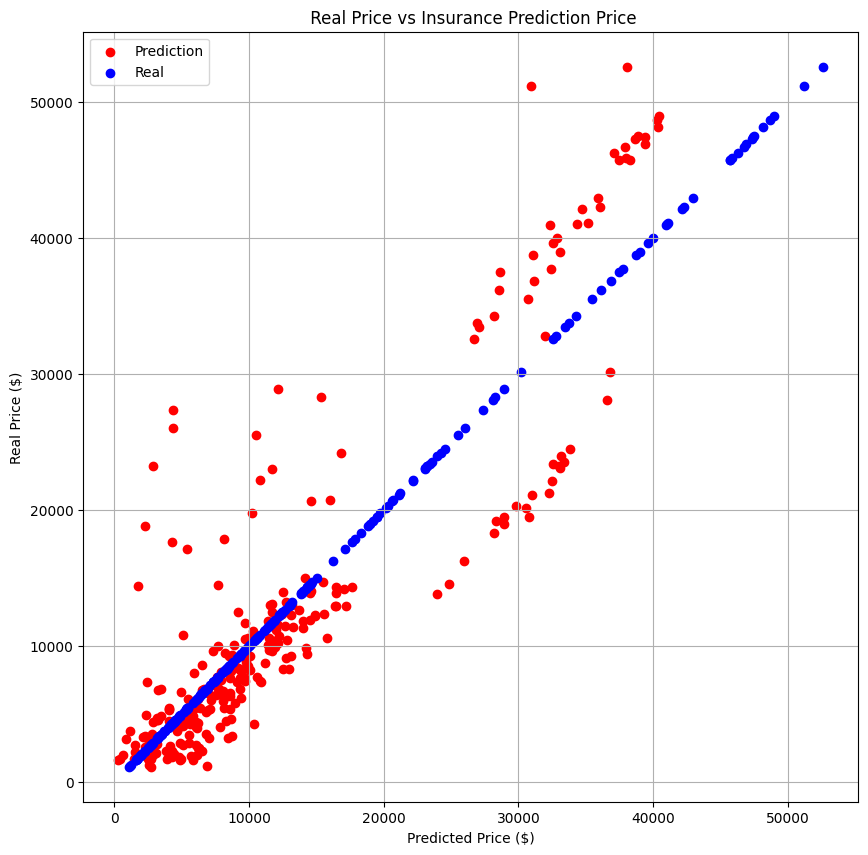

In [11]:
# Comparison Between Real Insurance Price and Prediction Price
y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, c='red', label='Prediction')
plt.scatter(y_test, y_test, c='blue', label='Real')
plt.title(' Real Price vs Insurance Prediction Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Real Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Conclusion

In conclusion, we have successfully built a linear regression model to predict the insurance charges based on various features such as age, bmi, sex, etc. The model achieved a reasonable level of accuracy with an R-squared value of 0.79 on the test set. The insights and trends identified in the exploratory data analysis have proven to be valuable in understanding the impact of different features on the insurance charges. The model can be used by insurance companies to predict the charges for potential customers and to identify the key drivers of insurance charges. Further work can be done to improve the model's performance and explore other machine learning algorithms for comparison.

Thank you for taking the time to explore this project with me. If you have any feedback or suggestions for improvement, please let me know. I hope you found this project informative and educational.